#### 여유 있을 때 배우면 좋은 것

- SQL
- Tablou

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False


### 카토 그램
<img src="https://www.yeongnam.com/mnt/file/202312/2023122701000950400039351.jpg" width=300>

- 특정 데이터 값에 따라 왜곡 된 그림, 항상 주의 해야 한다.
    - 3D로 된 도표 등
    - 선거철때 인구 수가 아닌 지역 너비로 그림은 만든 그림 등

#### Matplotlib 시각화 all in one

/home/tommy/miniconda3/envs/p311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


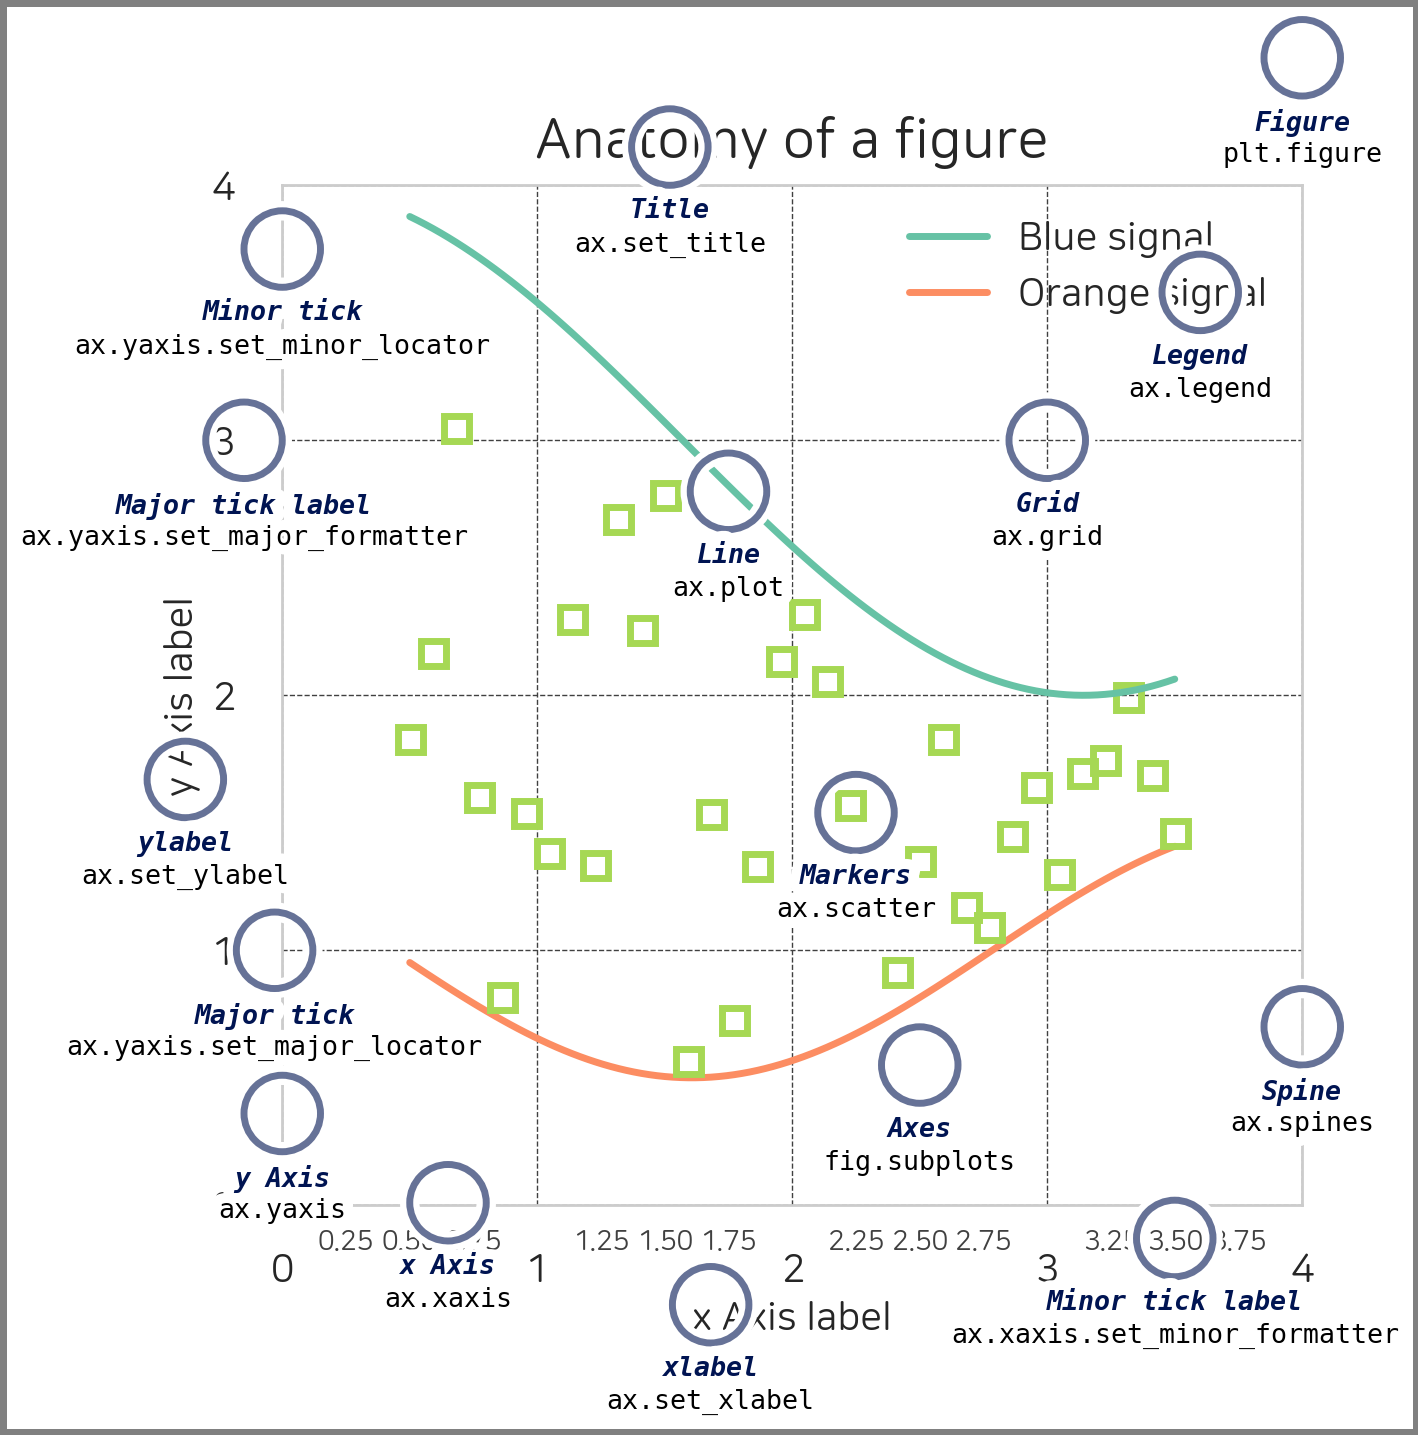

In [257]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]

# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)

# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)

annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show();

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

data = pd.read_csv("../../../data/heart.csv")

### 라인 그래프
- matplot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- seaborn : https://seaborn.pydata.org/generated/seaborn.lineplot.html

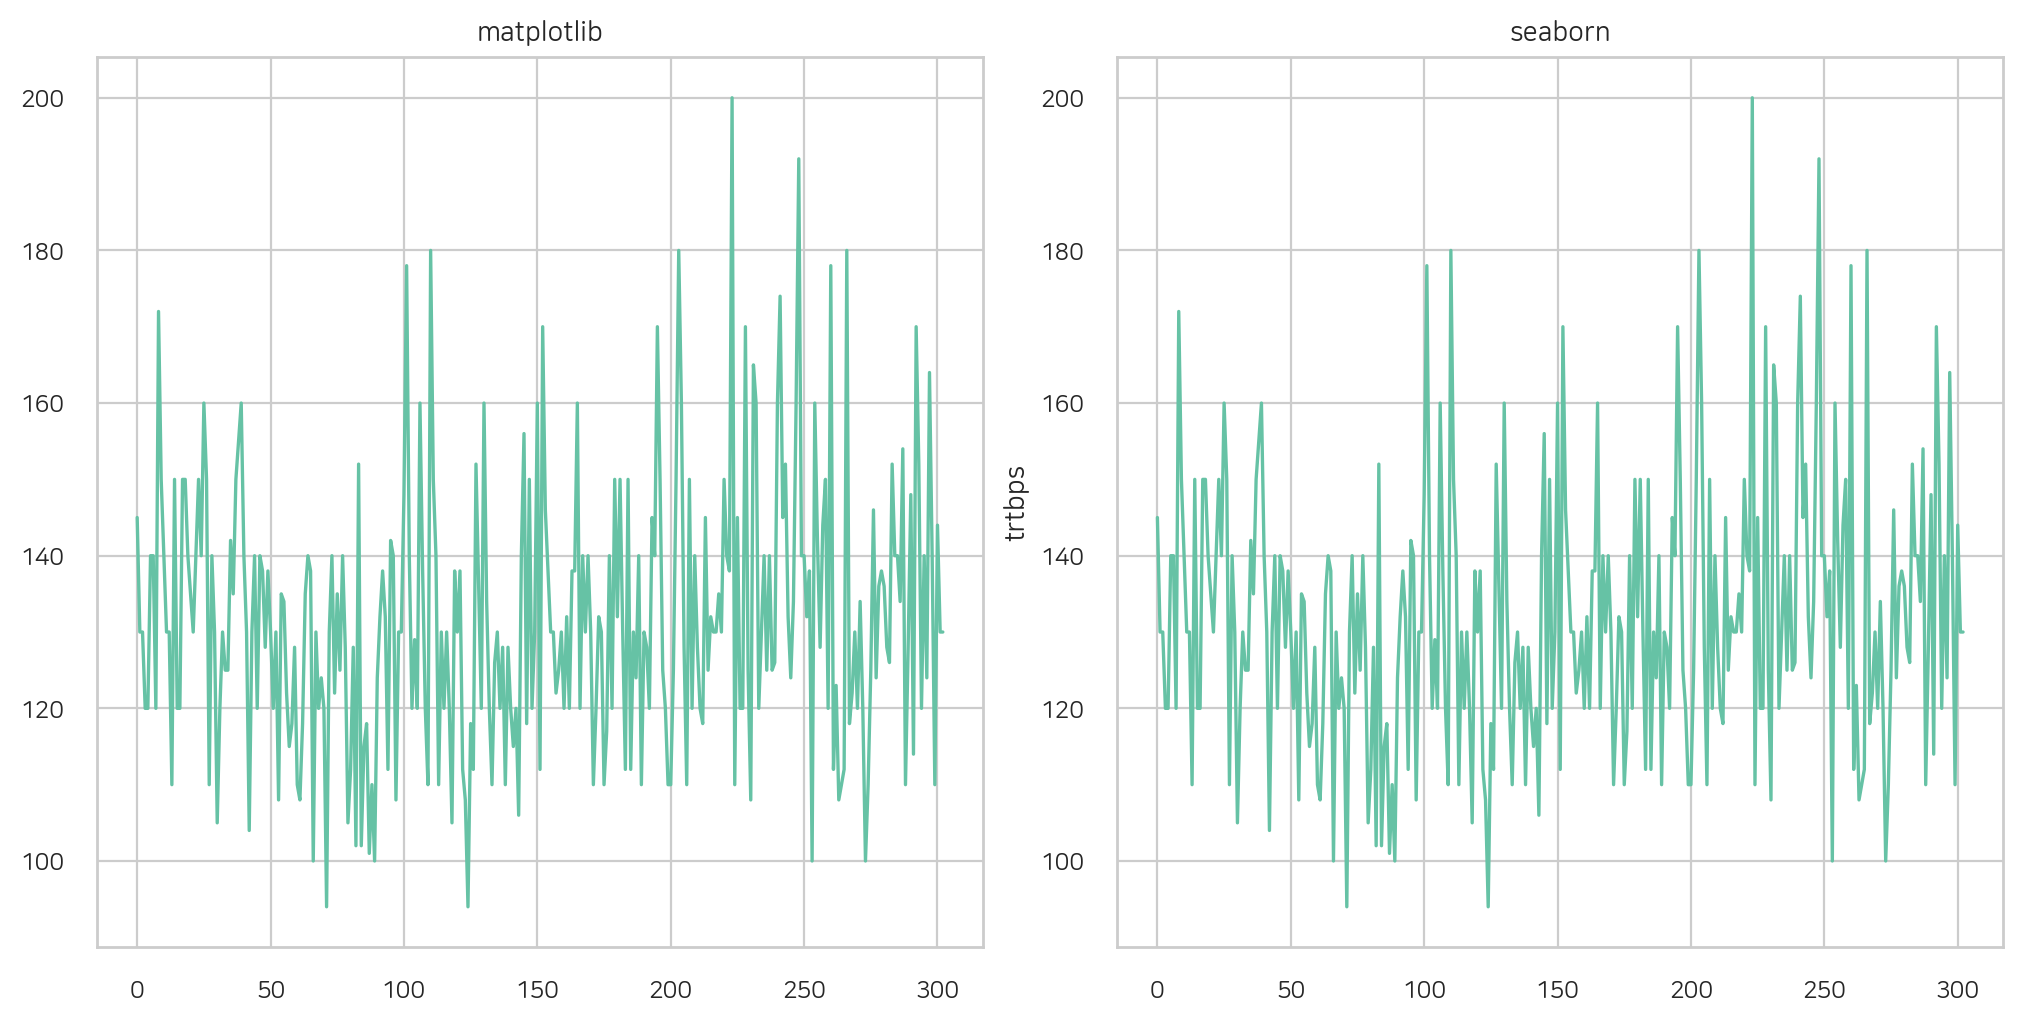

In [259]:
# Setting up plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# 선그래프
ax[0].plot(data["trtbps"]), ax[0].set_title("matplotlib")
sns.lineplot(data["trtbps"], ax=ax[1]), ax[1].set_title("seaborn");


### 산점도

- matplot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- seaborn: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

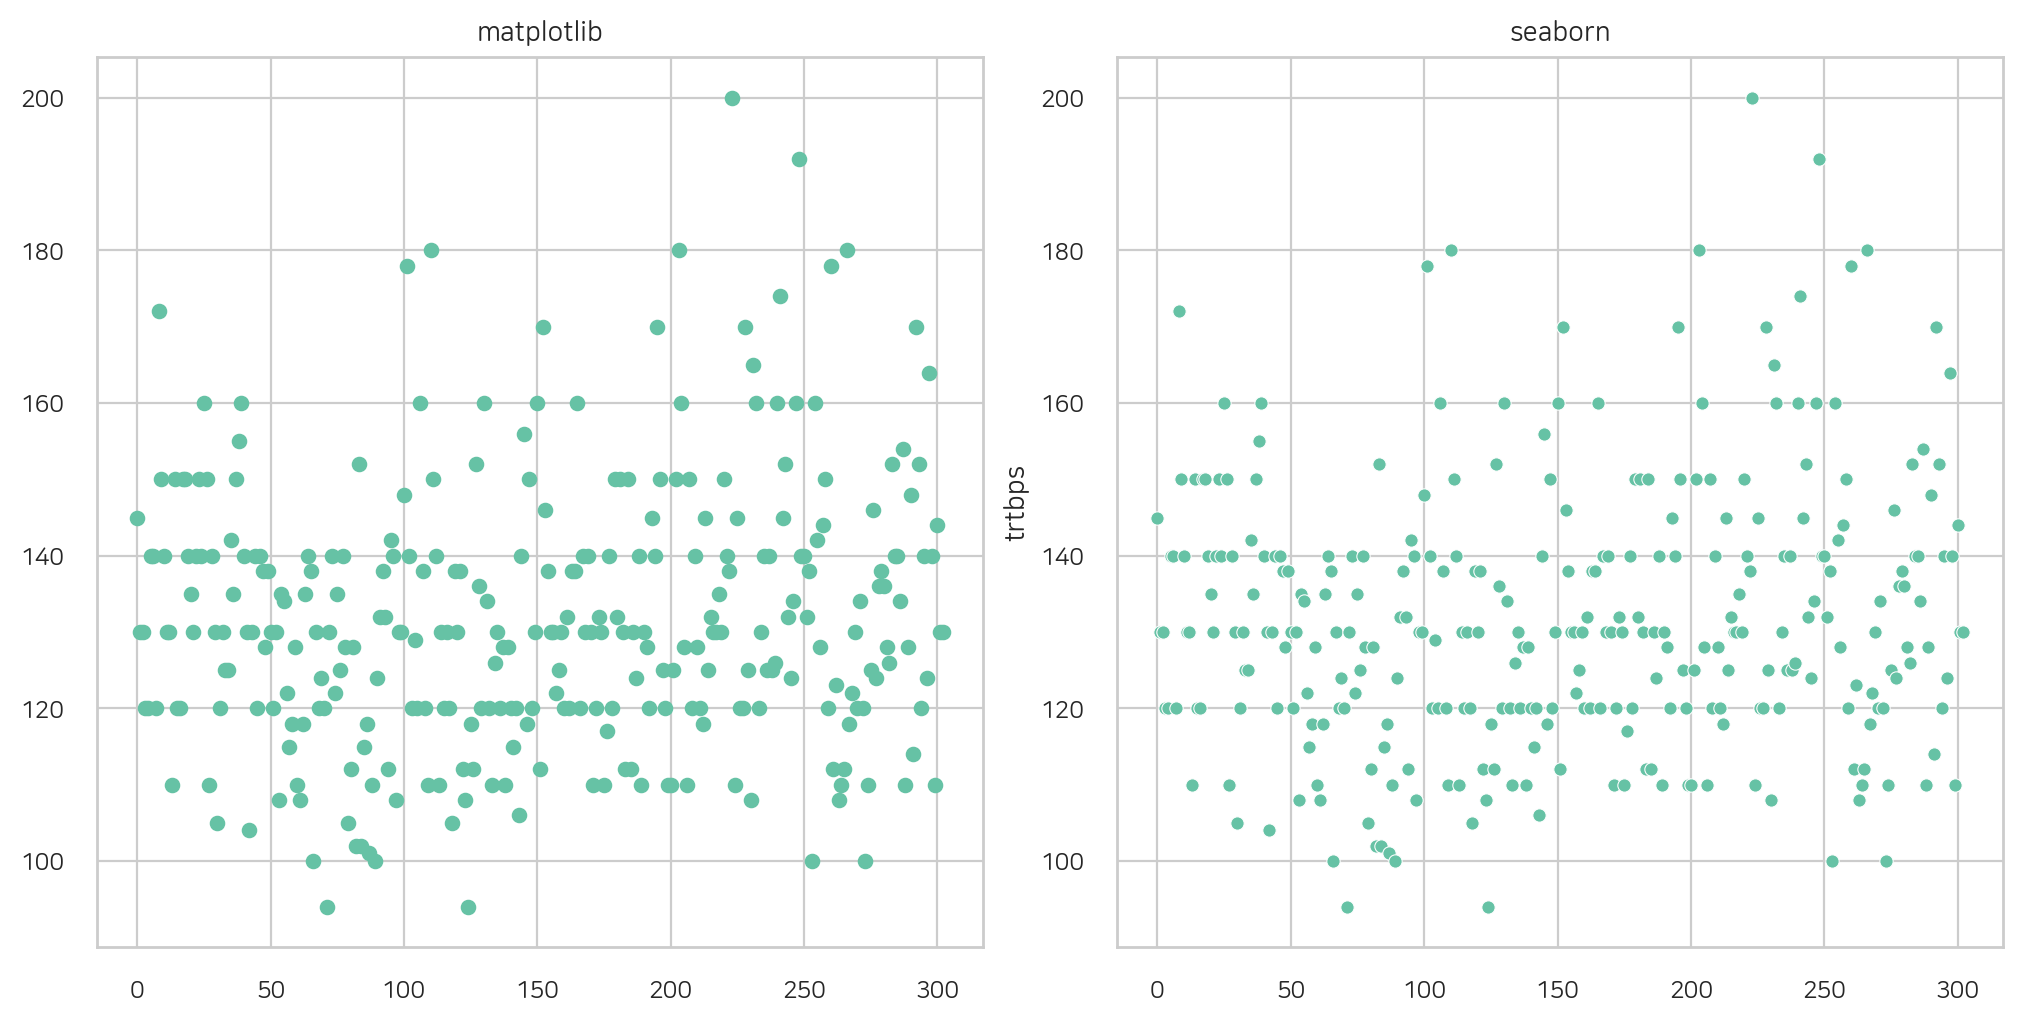

In [260]:
# Setting up plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# 선그래프
ax[0].scatter(data.index ,data["trtbps"]), ax[0].set_title("matplotlib")
sns.scatterplot(data["trtbps"], ax=ax[1]), ax[1].set_title("seaborn");

### 바 그래프

- matplot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- seaborn : https://seaborn.pydata.org/generated/seaborn.barplot.html

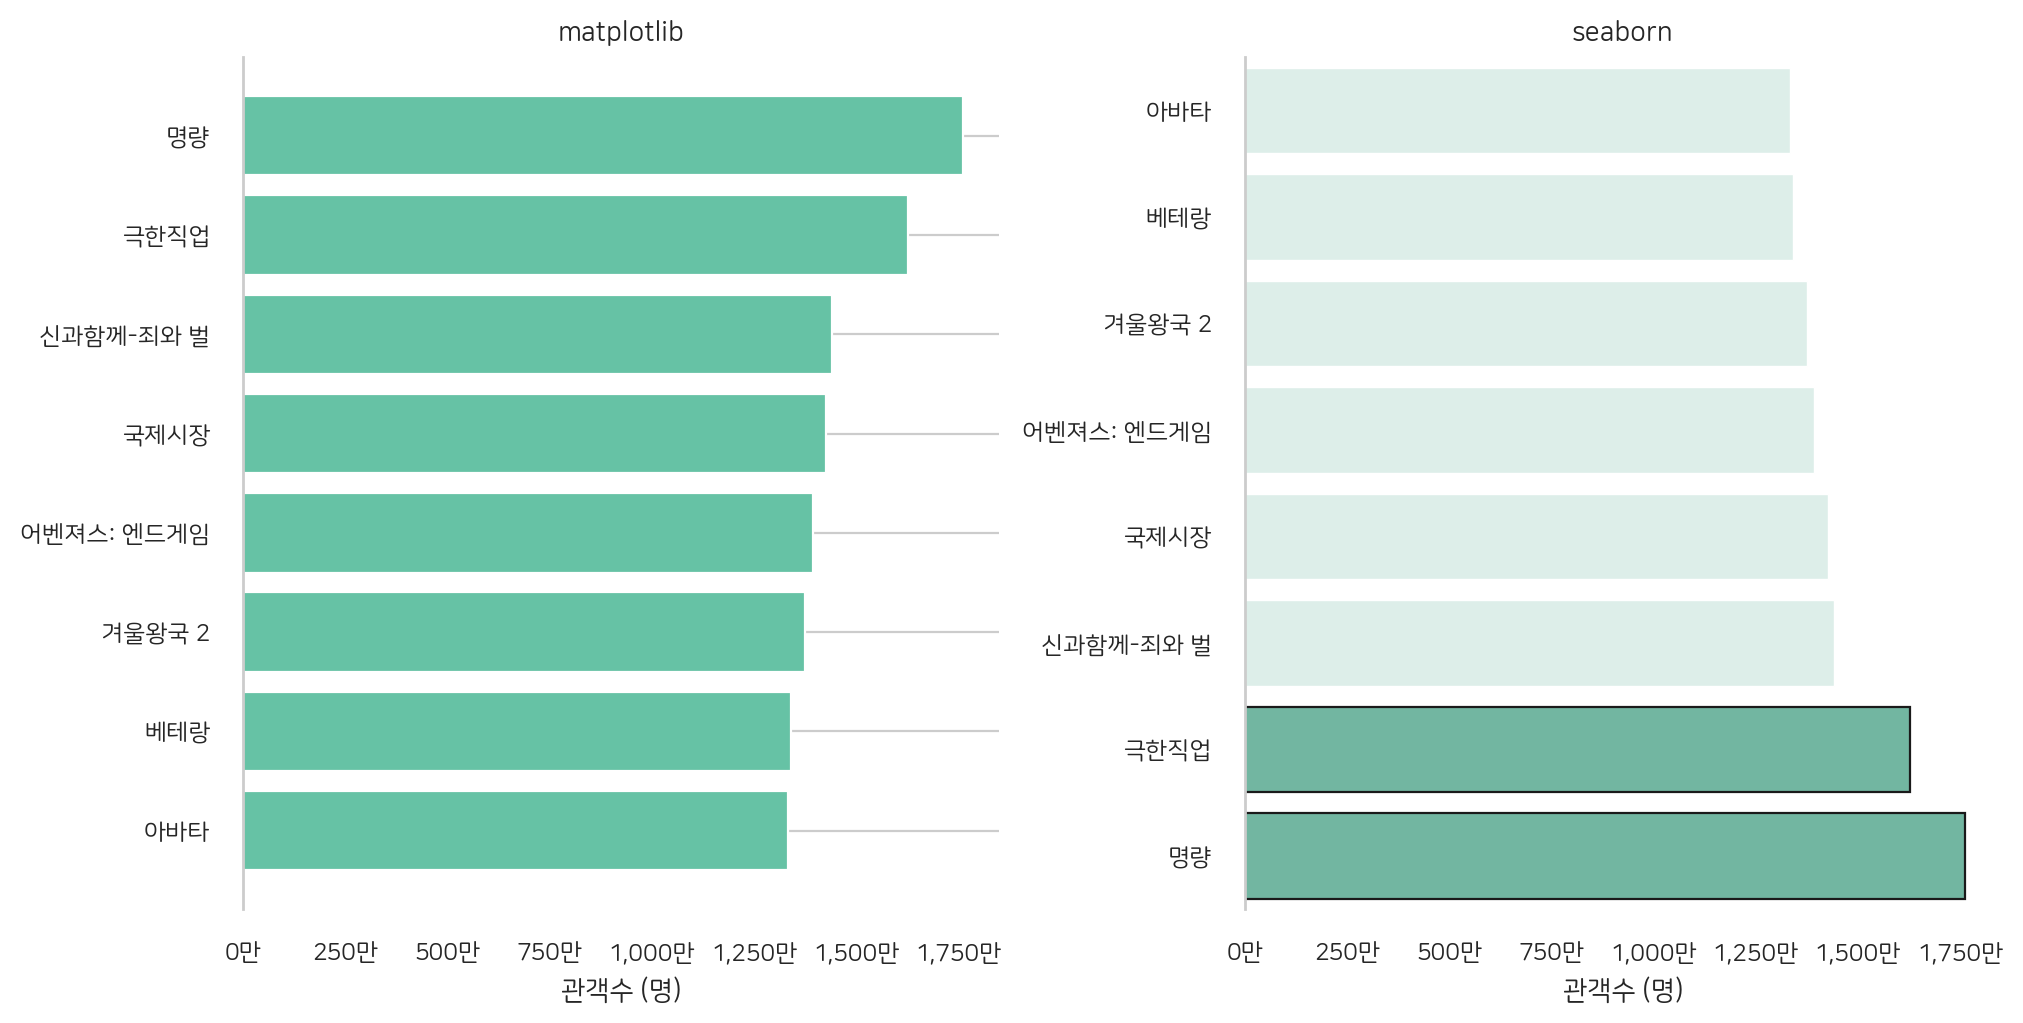

In [261]:
# Setting up plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Bar Chart
film_titles = ["명량", "극한직업", "신과함께-죄와 벌", "국제시장", "어벤져스: 엔드게임", "겨울왕국 2", "베테랑", "아바타"]
admissions = [17_613_682, 16_264_944, 14_410_754, 14_257_115, 13_934_592, 13_747_792, 13_414_372, 13_338_863]
formatter = FuncFormatter(lambda x, pos: f"{x / 10000:,.0f}만")

ax[0].barh(film_titles, admissions)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].invert_yaxis()
ax[0].set(xlabel="관객수 (명)", title="matplotlib")
ax[0].spines[["top", "right", "bottom"]].set_visible(False)
ax[0].grid(axis="x")

sns.barplot(x=admissions ,y=film_titles, ax=ax[1])
ax[1].xaxis.set_major_formatter(formatter)
ax[1].invert_yaxis()
ax[1].set(xlabel="관객수 (명)", title="seaborn")
ax[1].spines[["top", "right", "bottom"]].set_visible(False)
ax[1].grid(axis="x")

# 강조하기
for i ,p in enumerate(ax[1].patches):
    if i > 1:
        p.set_ec("w")
        p.set_lw(0.5)
        p.set_fc(sns.set_hls_values(p.get_fc(), l=0.9))
    else:
        p.set_ec("k")

### 히스토그램
- matplot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- seaborn : https://seaborn.pydata.org/generated/seaborn.histplot.html

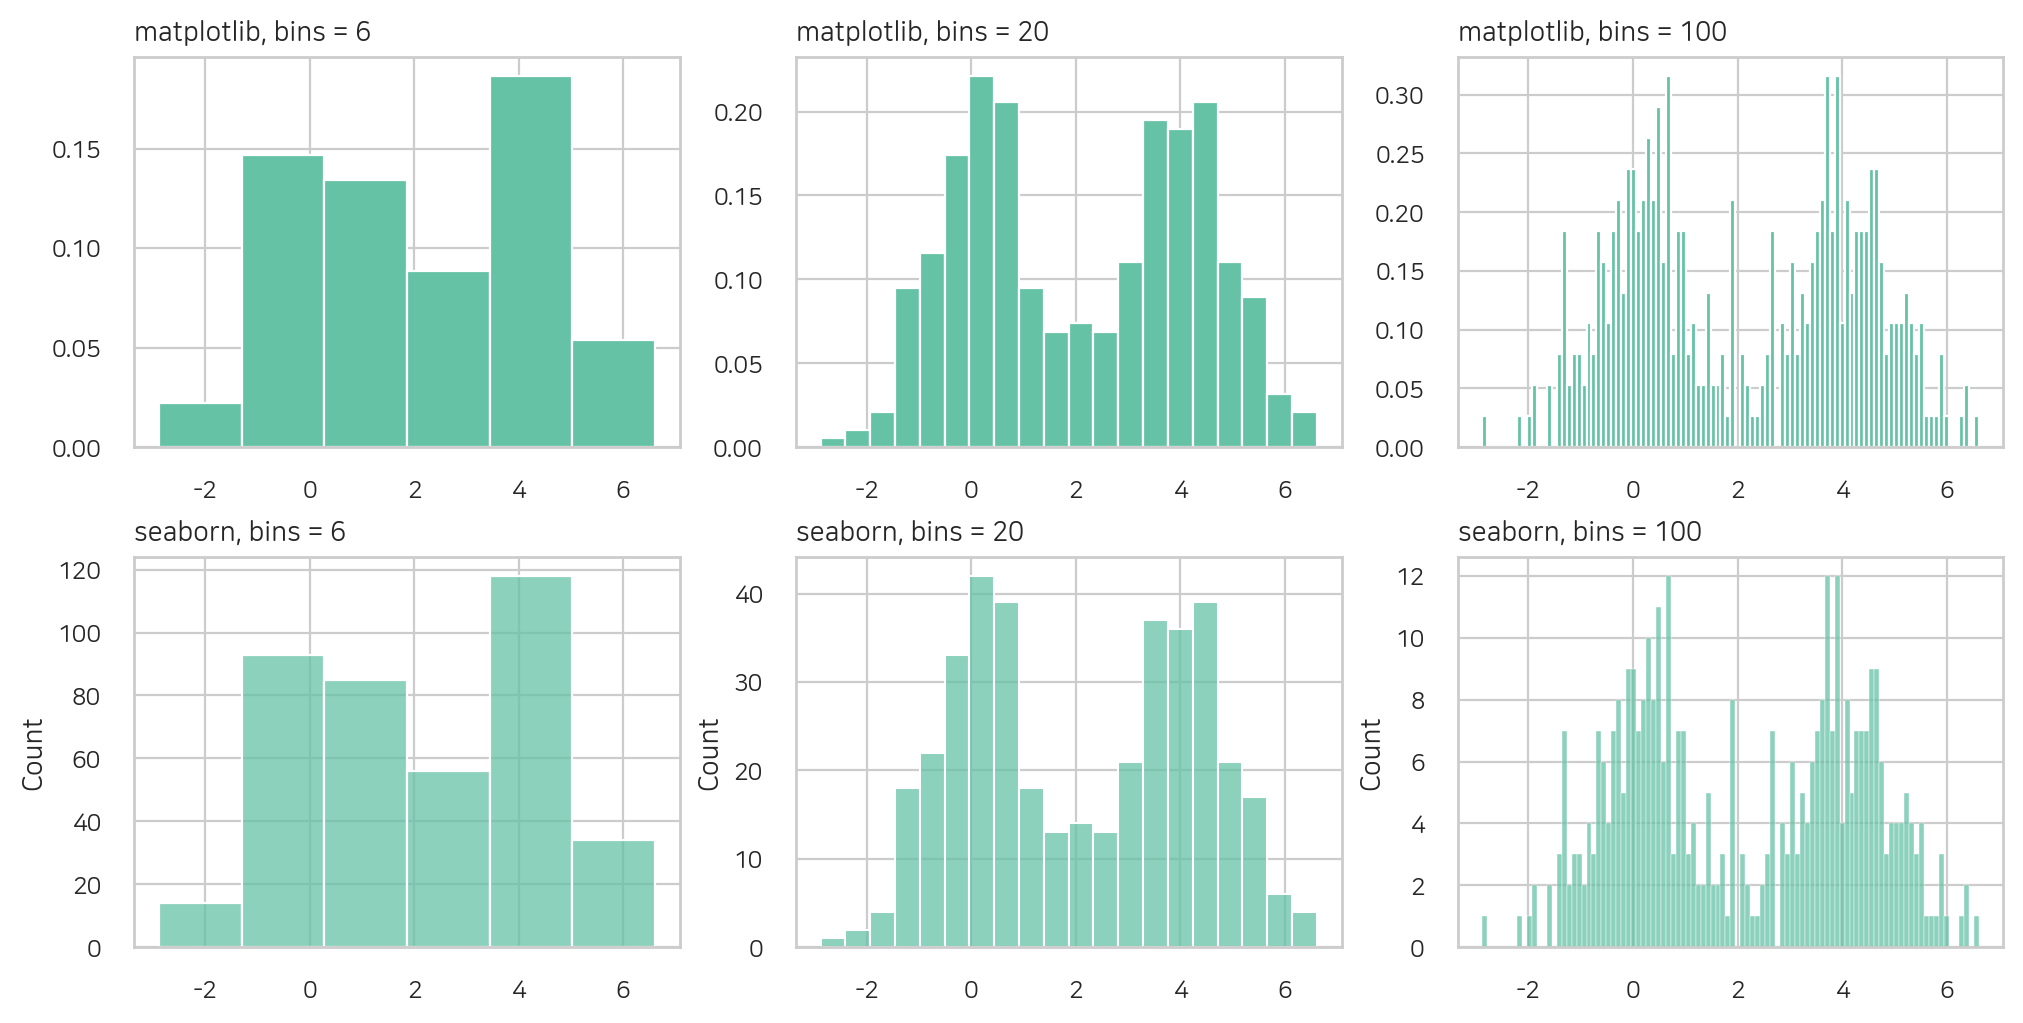

In [262]:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
fig, ax = plt.subplots(2, 3, figsize=(10, 5), constrained_layout=True)
ax = ax.flatten()

# Histogram
rng = np.random.default_rng(78)
n = 200
x = np.concatenate((rng.normal(loc=0, size=n), rng.normal(loc=4, size=n)))

for bins, axi in zip([6, 20, 100], ax[:3]):
    axi.hist(x, bins=bins, density=True)
    axi.set_title(f"matplotlib, bins = {bins}", loc="left")

for bins, axi in zip([6, 20, 100], ax[3:]):
    sns.histplot(data=x, bins=bins, ax=axi)
    axi.set_title(f"seaborn, bins = {bins}", loc="left")



### 육각 히스토그램(hexbin)
- matplot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
- seaborn : https://seaborn.pydata.org/examples/hexbin_marginals.html

/home/tommy/miniconda3/envs/p311/lib/python3.11/site-packages/seaborn/axisgrid.py:1766: UserWarning: The figure layout has changed to tight
  f.tight_layout()


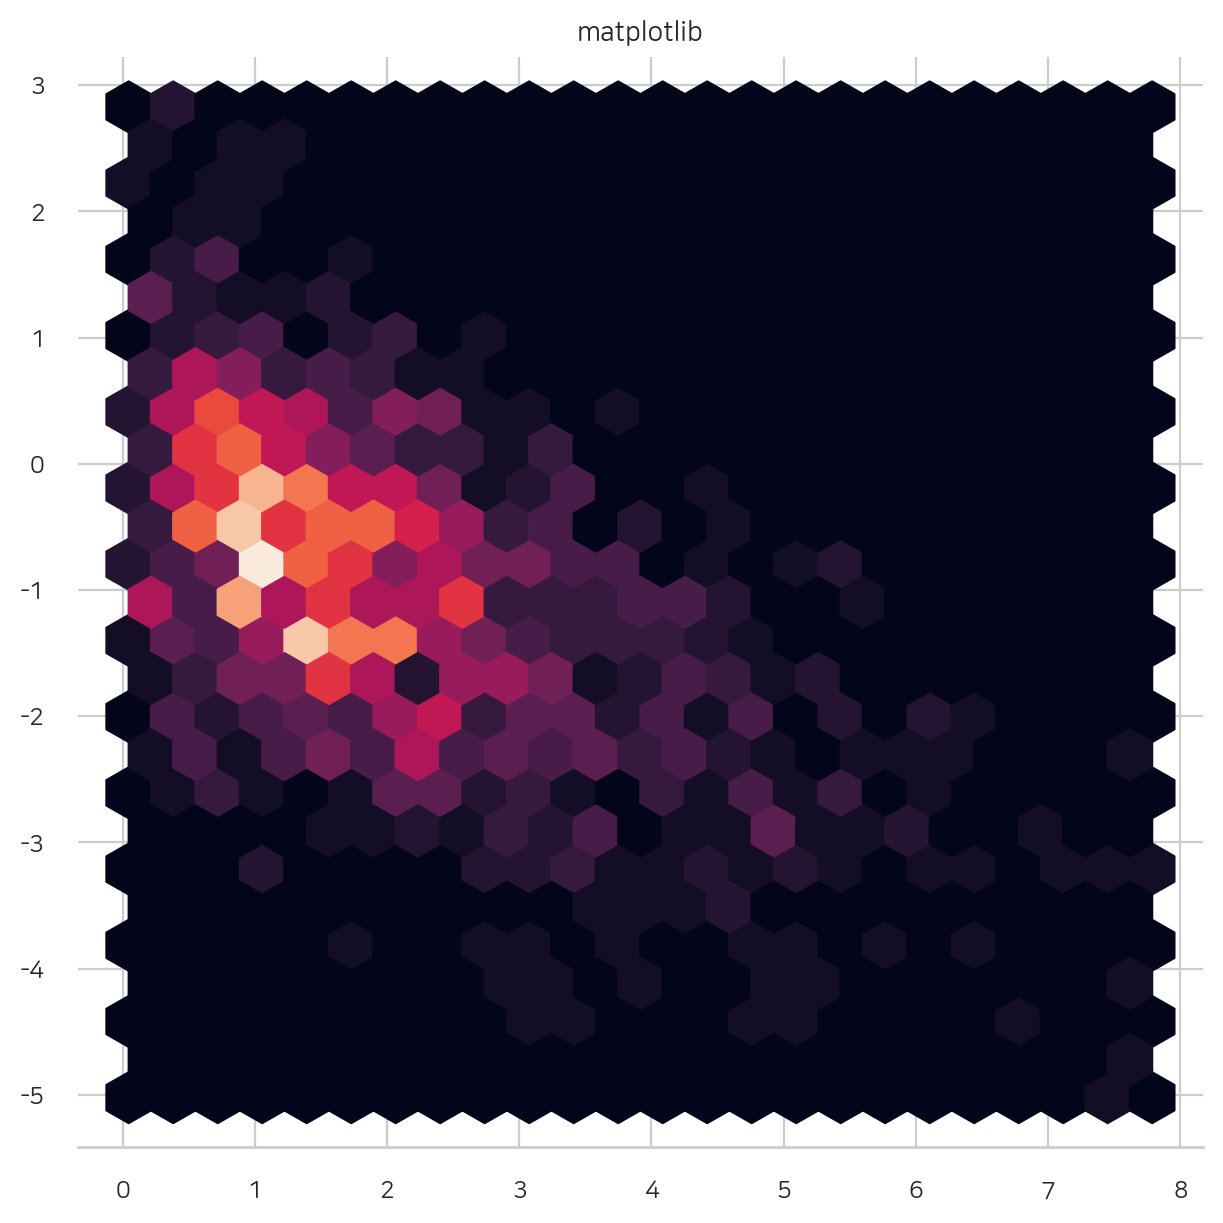

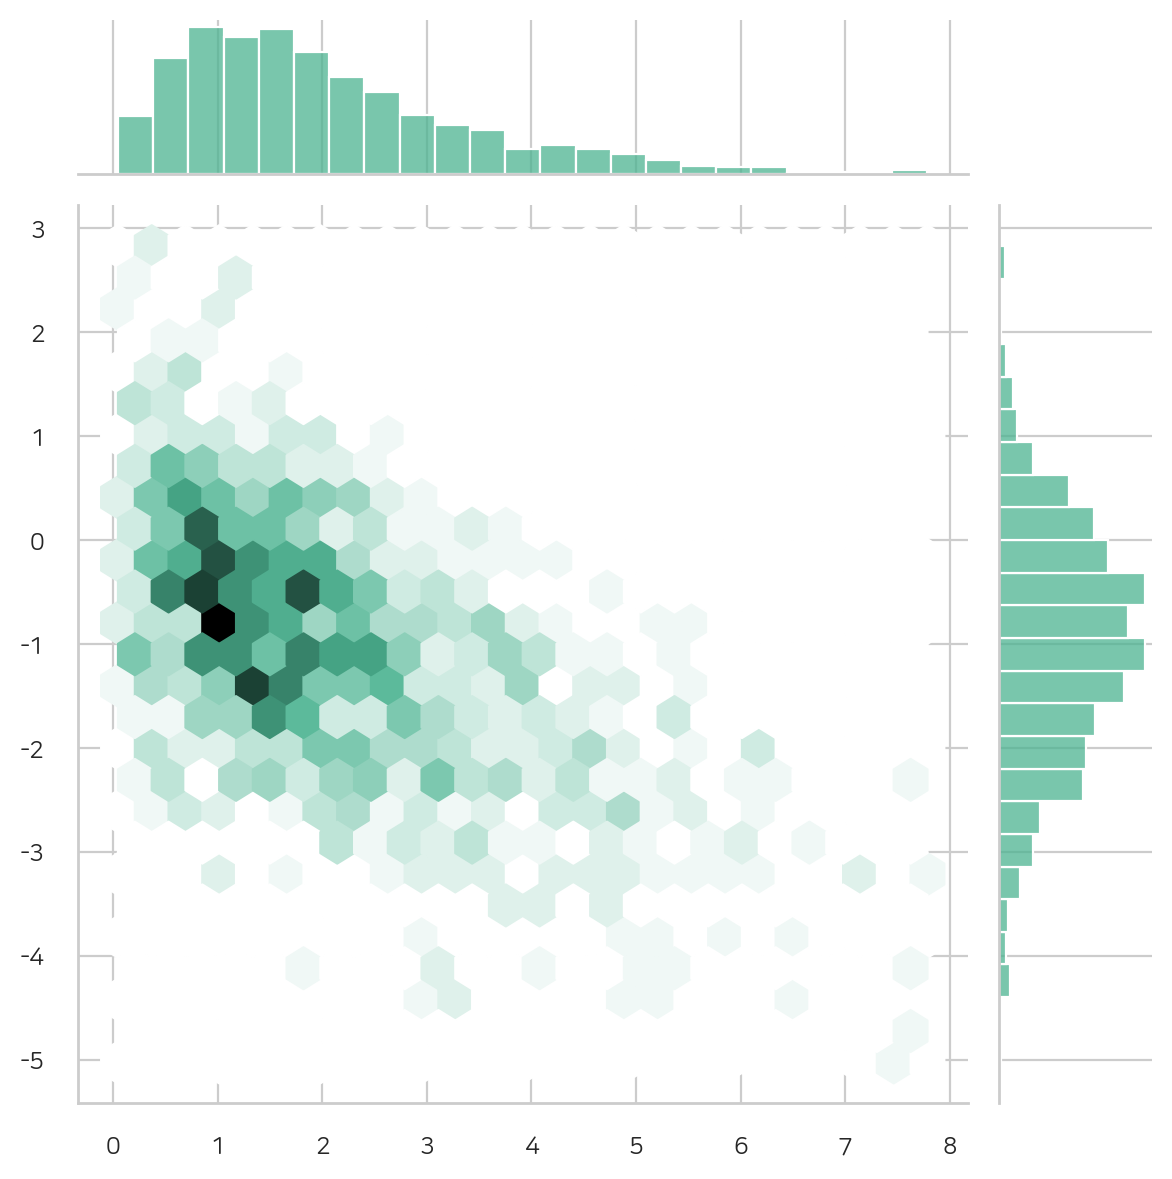

In [263]:
rs = np.random.RandomState(42)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

# matplotlib
fig, ax = plt.subplots(figsize=(6,6))
ax.hexbin(x, y, gridsize=23)
ax.set_title("matplotlib")
ax.spines[["top", "right", "left"]].set_visible(False)

# seaborn
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391");
sns.set_theme(style="ticks")

### 박스, 바이올린 플롯
- matplotlib = https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
    - [IQR](https://www.notion.so/pandas_5-34be7c2d77604e518f5e8fabaa9fec2d?pvs=21) : 수염
- seaborn = https://seaborn.pydata.org/generated/seaborn.violinplot.html    

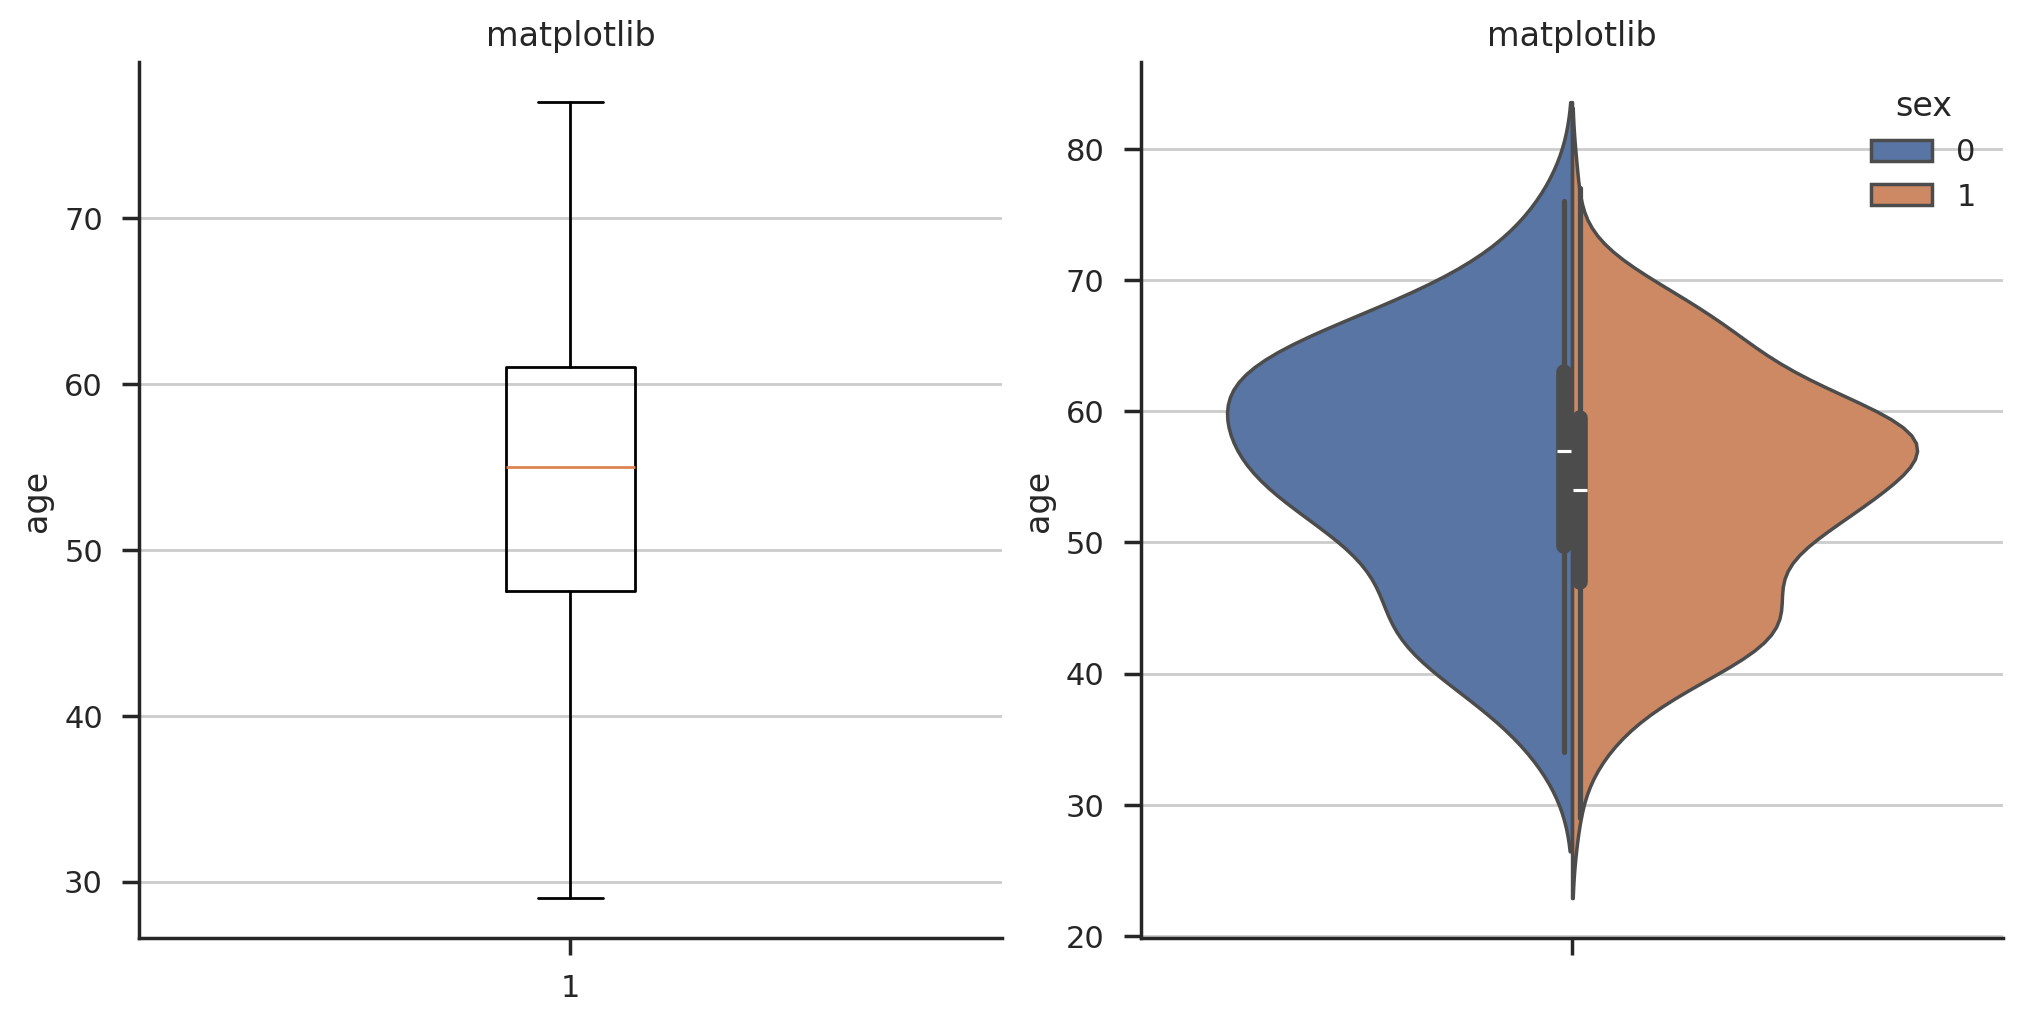

In [276]:
# Setting up plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Box Plot
ax[0].boxplot(data["age"])
ax[0].set(ylabel="age",title="matplotlib")
ax[0].spines[["top", "right"]].set_visible(False)
ax[0].grid(axis="y")

sns.violinplot(y="age",hue="sex",
               data=data,split=True,ax=ax[1])
ax[1].set(ylabel="age",title="matplotlib")
ax[1].spines[["top", "right"]].set_visible(False)
ax[1].grid(axis="y")

### 색상 선택하기

- 다양한 종류의 색상이 있다.

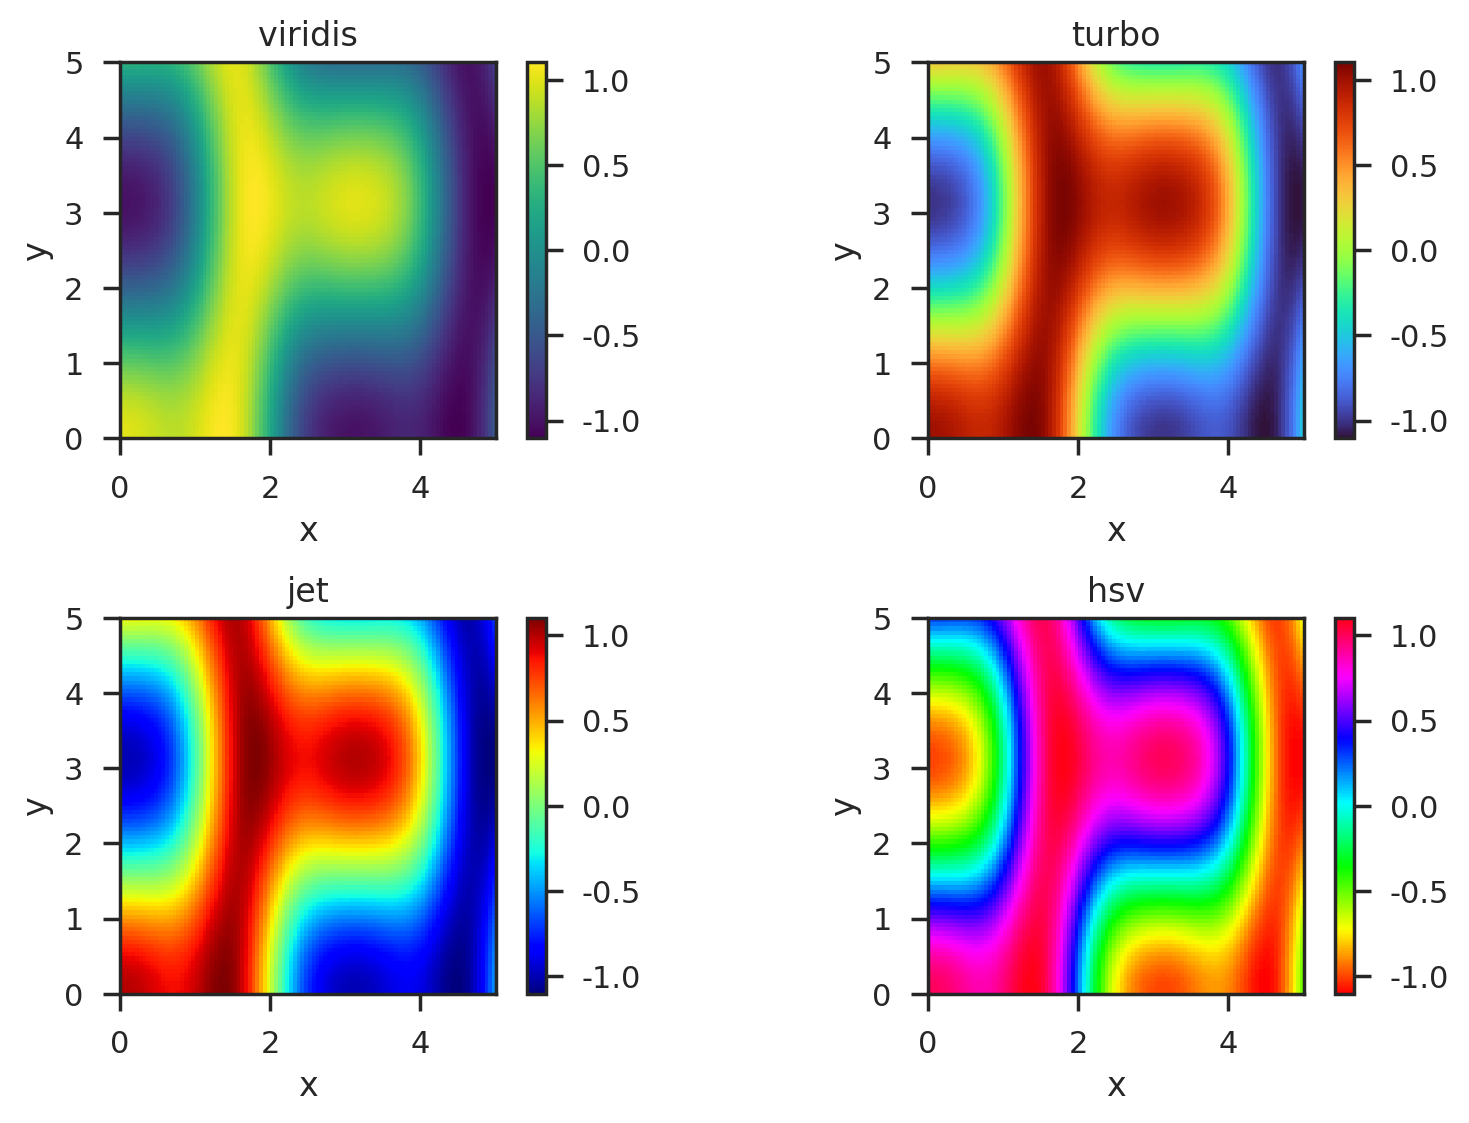

In [265]:
color_cycles = [
    ["#FF0000", "#00FF00", "#00FFFF"],
    ["red", "green", "cyan"],
    ["tab:red", "tab:green", "tab:cyan"],
]

x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 90)

X, Y = np.meshgrid(x, y)
Z = np.sin(X) ** 5 + np.cos(X) * np.cos(Y)

fig = plt.figure()
subfigs = fig.subfigures(2, 2)
for cmap, subfig in zip(["viridis", "turbo", "jet", "hsv"], subfigs.flat):
    ax = subfig.subplots()
    image = ax.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], origin="lower", cmap=cmap)
    subfig.colorbar(image, ax=ax)
    ax.set(
        xlabel="x",
        ylabel="y",
        title=cmap,
    )

### 파일저장

In [266]:
# fig.savefig("image.png")
# fig.savefig("image-transparent.png", transparent=True)
# fig.savefig("image-600dpi.png", dpi=600) # 논문할때는 이정도는 되야함.
# fig.savefig("image.jpg")
# fig.savefig("image.svg")
# fig.savefig("image.pdf")